In [21]:
'''
training on two new data set which added noise to certain query data(attributes)
'''

'\ntraining on two new data set which added noise to certain query data(attributes)\n'

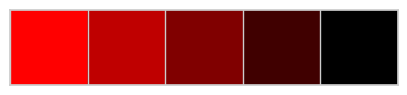

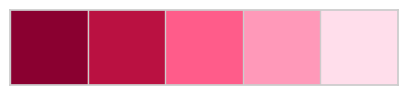

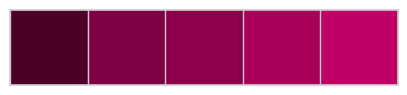

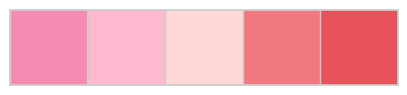

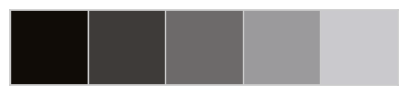

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [23]:
'''
Reading Dataset
'''
# --- Importing Dataset ---
df = pd.read_csv("datasets/heart_original.csv")

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

In [24]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 1025
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

In [25]:
# --- Fix Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

In [26]:
'''
Numerical Variable
Descriptive Statistics

'''
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

In [27]:
'''
How many people are the oldest in the processed.cleveland data set?
What is the oldest age?
Create 1 new data sets: df_v2
'''

from tabulate import tabulate

df_v1 = df

# df_v2 -----------------------------------------------------------------------------------------------------
# Find the maximum age
max_age = df_v1['age'].max()

# Count the number of people with the maximum age
num_oldest = df_v1[df_v1['age'] == max_age]['age'].count()

# Output the results
print("There are {} people who are the oldest in the dataset, with an age of {}.".format(num_oldest, max_age))

# Create a new dataset by removing one record where age=77
df_v2 = df_v1.drop(df_v1[df_v1['age'] == 77].index[0])

# Verify the result
print("Number of records in the original dataset: {}".format(len(df_v1)))
print("Number of records in the new dataset (df_v2): {}".format(len(df_v2)))


There are 3 people who are the oldest in the dataset, with an age of 77.
Number of records in the original dataset: 1025
Number of records in the new dataset (df_v2): 1024


In [28]:
'''
Create 1 new data sets: df_v3
'''
# df_v3 -----------------------------------------------------------------------------------------------------
# Find the youngest age
youngest_age = df_v1['age'].min()

# Count the number of people with the youngest age
num_youngest = df_v1[df_v1['age'] == youngest_age]['age'].count()

# Output the results
print("There are {} people who are the youngest in the dataset, with an age of {}.".format(num_youngest, youngest_age))

# Find the index of one person with age=29
index_to_drop = df_v1[df_v1['age'] == 29].index[0]

# Create a new data set (df_v3) by dropping one row with age=29
df_v3 = df_v1.drop(index_to_drop)

# Verify the result
print("Number of records in the original dataset: {}".format(len(df_v1)))
print("Number of records in the new dataset (df_v2): {}".format(len(df_v3)))

There are 4 people who are the youngest in the dataset, with an age of 29.
Number of records in the original dataset: 1025
Number of records in the new dataset (df_v2): 1024


In [29]:
# Comparison -----------------------------------------------------------------------------------------------------------------------
# Number of records in df_v1 and df_v2
num_records = [["df_v1", len(df_v1)], ["df_v2", len(df_v2)], ["df_v3", len(df_v3)]]

# Output as table
print(tabulate(num_records, headers=["Dataset", "Number of Records"], tablefmt="grid"))

+-----------+---------------------+
| Dataset   |   Number of Records |
+===========+=====================+
| df_v1     |                1025 |
+-----------+---------------------+
| df_v2     |                1024 |
+-----------+---------------------+
| df_v3     |                1024 |
+-----------+---------------------+


In [30]:
'''
Let's train model on the new data set (df_v2) to see if the new data set is useful
'''

"\nLet's train model on the new data set (df_v2) to see if the new data set is useful\n"

In [31]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df_v2.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df_v2.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df_v2.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 1024
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1024 non-null   int64  
 1   sex       1024 non-null   object 
 2   cp        1024 non-null   object 
 3   trestbps  1024 non-null   int64  
 4   chol      1024 non-null   int64  
 5   fbs       1024 non-null   object 
 6   restecg   1024 non-null   object 
 7   thalach   1024 non-null   int64  
 8   exang     1024 non-null   object 
 9   oldpeak   1024 non-null   float64
 10  slope     1024 non-null   object 
 11  ca        1024 non-null   object 
 12  thal      1024 non-null   object 
 13  target    1024 non-null   int64  
dtypes: float64(1), int64(5), object(8)

In [32]:
# --- Fix Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_v2[lst] = df_v2[lst].astype(object)

In [33]:
'''
Numerical Variable
Descriptive Statistics

'''
# --- Descriptive Statistics ---
df_v2.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

In [34]:
'''
Dataset Pre-processing
One-Hot Encoding
'''
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df_v2['cp'], prefix='cp')
thal = pd.get_dummies(df_v2['thal'], prefix='thal')
slope = pd.get_dummies(df_v2['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df_v2, cp, thal, slope]
df_v2 = pd.concat(frames, axis = 1)

In [35]:
# --- Display New Data Frame ---
df_v2.head().style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

In [36]:
'''
Dropping Unnecessary Variables 
'''
# --- Drop Unnecessary Variables ---
df_v2 = df_v2.drop(columns = ['cp', 'thal', 'slope'])

In [37]:
# --- Display New Data Frame ---
df_v2.head().style.background_gradient(cmap='Reds').hide_index().set_properties(**{'font-family': 'Segoe UI'})

In [38]:
'''
Features Separating 
'''
# --- Seperating Dependent Features ---
x = df_v2.drop(['target'], axis=1)
y = df_v2['target']

In [39]:
'''
Data Normalization
'''
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

In [40]:
'''
Splitting the Dataset 
'''
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [41]:
'''
Model Implementation
'''

'\nModel Implementation\n'

In [42]:
'''
Logistic Regression
'''
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)



# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

.:. Logistic Regression Accuracy: 87.80% .:.


In [43]:
'''
K-Nearest Neighbour (KNN)
'''
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)


# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')


.:. K-Nearest Neighbour Accuracy: 98.05% .:.


In [44]:
'''
Support Vector Machine (SVM)
'''
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)


# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

.:. Support Vector Machine Accuracy: 85.85% .:.


In [45]:
'''
Gaussian Naive Bayes

'''
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)


# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

.:. Gaussian Naive Bayes Accuracy: 88.78% .:.


In [46]:
'''
Decision Tree

'''

# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)



# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

.:. Decision Tree Accuracy: 86.83% .:.


In [47]:
'''
Random Forest
'''

# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

.:. Random Forest Accuracy: 91.71% .:.


In [48]:
'''
Gradient Boosting
'''

# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)


# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')


.:. Gradient Boosting Accuracy: 91.71% .:.


In [49]:
'''
Model Comparison
'''
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting'
                                  ], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})